Кобзарь О.С. Хабибуллин Р.А. 2019 г.

# Инклинометрия и конструкция скважин

In [1]:
import sys
sys.path.append('../')

import uniflocpy.uTools.data_workflow as utool
import uniflocpy.uWell.uPipe as Pipe
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import pandas as pd
init_notebook_mode(connected=True)


In [112]:
incination_well_data = pd.read_excel('./data/Инклинометрия 2196 нп.xls')

In [113]:
incination_well_data = incination_well_data.iloc[:-1]

In [114]:
incination_well_data

,"Глубина конца интервала, м",Номер ствола (инклинометрия),"Угол, гpад","Азимут, гpад","Удлинение, м",Вертикальная отметка,Координата Х (инклинометрия),Координата Y (инклинометрия),"Смещение (по линии устье-забой), м","Дирекционный угол, град",Кривизна,"Глубина начала интервала, м",Признак максимальной кривизны,Дата корректировки
0,3361,0.0,"89,9","114,02","1473,07","1887,93","27,59","-1392,74","1393,01",0.0,"0,38",3354,нет,2018-06-05 11:52:00
1,3354,0.0,90,"113,77","1466,07","1887,93","23,18","-1387,31","1387,5",0.0,"0,55","3330,2",нет,2018-06-05 11:52:00
2,"3330,2",0.0,"90,12","112,47","1442,25","1887,95","7,91","-1369,05","1369,07",0.0,"0,34","3305,8",нет,2018-06-05 11:52:00
3,"3305,8",0.0,"90,43","113,23","1417,73","1888,07","-7,83","-1350,4","1350,42",0.0,"1,18","3281,4",нет,2018-06-05 11:52:00
4,"3281,4",0.0,"89,63","115,99","1393,32","1888,08","-22,99","-1331,29","1331,49",0.0,"0,25","3256,9",нет,2018-06-05 11:52:00
5,"3256,9",0.0,"89,51","116,59",1369,"1887,9","-37,64","-1311,65","1312,19",0.0,"0,17","3232,5",нет,2018-06-05 11:52:00
6,"3232,5",0.0,"89,51","117,01","1344,81","1887,69","-52,06","-1291,97","1293,02",0.0,"0,83",3208,нет,2018-06-05 11:52:00
7,3208,0.0,"88,4","115,32","1320,76","1887,24","-66,75","-1272,37","1274,12",0.0,"0,94","3183,5",нет,2018-06-05 11:52:00
8,"3183,5",0.0,"88,71","113,03","1296,87","1886,63","-82,11","-1253,29","1255,98",0.0,"0,96","3159,1",нет,2018-06-05 11:52:00
9,"3159,1",0.0,"90,31","114,75","1272,68","1886,42","-97,51","-1234,37","1238,22",0.0,"0,52","3134,7",нет,2018-06-05 11:52:00


In [115]:
incination_well_data.columns

Index(['Глубина конца интервала, м', 'Номер ствола (инклинометрия)',
       'Угол, гpад', 'Азимут, гpад', 'Удлинение, м', 'Вертикальная отметка',
       'Координата Х (инклинометрия)', 'Координата Y (инклинометрия)',
       'Смещение (по линии устье-забой), м', 'Дирекционный угол, град',
       'Кривизна', 'Глубина начала интервала, м',
       'Признак максимальной кривизны', 'Дата корректировки'],
      dtype='object')

In [116]:
def change_column_type_to_float(column):
    column = column.str.replace(',','.')
    column = column.astype('float64')
    return column


In [117]:
incination_well_data['Координата Х (инклинометрия)'] = change_column_type_to_float(incination_well_data['Координата Х (инклинометрия)'])
incination_well_data['Координата Y (инклинометрия)'] = change_column_type_to_float(incination_well_data['Координата Y (инклинометрия)'])
incination_well_data['Вертикальная отметка'] = change_column_type_to_float(incination_well_data['Вертикальная отметка'])
incination_well_data['Глубина конца интервала, м'] = change_column_type_to_float(incination_well_data['Глубина конца интервала, м'])
incination_well_data['Угол, гpад'] = change_column_type_to_float(incination_well_data['Угол, гpад'])


In [118]:
import matplotlib.pyplot as plt
from scipy import interpolate
xx = incination_well_data['Глубина конца интервала, м']
yy = incination_well_data['Вертикальная отметка']
ff = interpolate.interp1d(xx, yy)

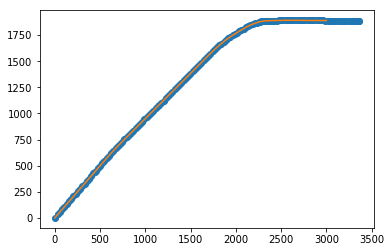

In [119]:
xnew = np.arange(0, 3000)
ynew = ff(xnew)   # use interpolation function returned by `interp1d`
plt.plot(xx, yy, 'o', xnew, ynew, '-')
plt.show()

In [120]:
ynew = ff(incination_well_data['Глубина конца интервала, м']) * (-1)

In [121]:
print(ynew)

[-1887.93 -1887.93 -1887.95 -1888.07 -1888.08 -1887.9  -1887.69 -1887.24
 -1886.63 -1886.42 -1886.67 -1886.89 -1887.33 -1888.03 -1888.64 -1889.02
 -1889.28 -1889.55 -1889.62 -1889.61 -1889.7  -1889.87 -1889.78 -1889.72
 -1889.93 -1890.26 -1890.85 -1891.56 -1891.87 -1891.72 -1891.56 -1891.52
 -1891.5  -1891.55 -1891.39 -1890.86 -1890.16 -1889.57 -1889.34 -1889.1
 -1888.8  -1888.69 -1888.51 -1888.17 -1887.65 -1887.18 -1885.37 -1884.36
 -1882.87 -1881.   -1878.71 -1876.13 -1870.04 -1862.86 -1854.82 -1845.78
 -1835.59 -1824.36 -1812.31 -1799.59 -1786.52 -1773.53 -1760.61 -1747.52
 -1734.11 -1719.38 -1703.39 -1686.69 -1669.08 -1651.29 -1633.15 -1614.26
 -1593.57 -1572.6  -1551.29 -1530.43 -1508.48 -1487.   -1465.67 -1444.34
 -1422.88 -1401.69 -1380.36 -1359.12 -1337.82 -1316.46 -1294.93 -1273.42
 -1251.96 -1230.28 -1208.66 -1187.27 -1166.   -1144.88 -1123.7  -1102.38
 -1083.55 -1069.52 -1048.26 -1027.13 -1005.82  -984.59  -963.34  -942.04
  -920.64  -899.15  -877.89  -856.81  -835.69  -814.

In [122]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

#x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
x = incination_well_data['Координата Х (инклинометрия)']
y = incination_well_data['Координата Y (инклинометрия)']
z = incination_well_data['Вертикальная отметка'] * (-1)  # перевод в альтитуду
#x, y, z = list(range(100)) , list(range(100)), list(range(100))
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    #line=dict(color='#1f77b4',
    #          width=10
    #)
    )

trace2 = go.Scatter3d(
    x=x,
    y=y,
    z=ynew,
    marker=dict(
        size=5
    ),
    #line=dict(color='#1f77b4',
    #          width=10
    #)
    )

data = [trace1]


layout = dict(title = '3D профиль скважины',  yaxis=dict(autorange='reversed'))
fig = dict(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

In [123]:
h_pump_mes_m = 1000 
h_pump_vert_m = 700
h_bottomhole_mes_m = 2000
h_bottomhole_vert_m = 1200
h_mes_data_m = [0, h_pump_mes_m, h_bottomhole_mes_m]
h_vert_data_m = [0, h_pump_vert_m, h_bottomhole_vert_m]




In [124]:
simple_well_linear = interpolate.interp1d(h_mes_data_m, h_vert_data_m)
simple_well_quadratic = interpolate.interp1d(h_mes_data_m, h_vert_data_m, kind = 'quadratic')

In [125]:
h_mes_new_m = np.arange(0, h_bottomhole_mes_m)
h_vert_new_linear_m = simple_well_linear(h_mes_new_m)
h_vert_new_quadratic_m = simple_well_quadratic(h_mes_new_m)

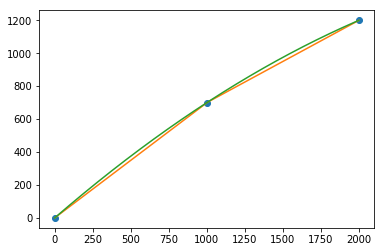

In [126]:
plt.plot(h_mes_data_m, h_vert_data_m, 'o')
plt.plot(h_mes_new_m, h_vert_new_linear_m,  '-')
plt.plot(h_mes_new_m, h_vert_new_quadratic_m,  '-')
plt.show()

In [128]:
simple_well(1100)

array(750.)

In [88]:


a = np.array([32.49, -39.96,-3.86])
b = np.array([31.39, -39.28, -4.66])
c = np.array([31.14, -38.09,-4.49])

ba = a - b
bc = c - b

cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
angle = np.arccos(cosine_angle)

print(np.degrees(angle))

120.52106374124477


In [85]:
import numpy as np

In [89]:


a = np.array([32.49, -39.96,-3.86])
b = np.array([5, -39.28, -4.66])
c = np.array([31.14, -38.09,-4.49])

ba = a - b
bc = c - b

cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
angle = np.arccos(cosine_angle)

print(np.degrees(angle))

120.52106374124477


In [97]:
x1 = incination_well_data['Координата Х (инклинометрия)'][144]
y1 = incination_well_data['Координата Y (инклинометрия)'][144]
z1 = incination_well_data['Вертикальная отметка'][144]

x2 = incination_well_data['Координата Х (инклинометрия)'][143]
y2 = incination_well_data['Координата Y (инклинометрия)'][143]
z2 = incination_well_data['Вертикальная отметка'][143]

In [103]:


b = np.array([x1, y1,z1])
a = np.array([x2, y2,z2])
c = np.array([0, 0, 1])

ba = a - b
#bc = c - b
bc = c

cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
angle = np.arccos(cosine_angle)

print(np.degrees(angle))

0.1465633385959811


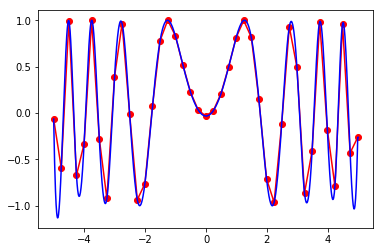

In [104]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

import matplotlib.pyplot as plt
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

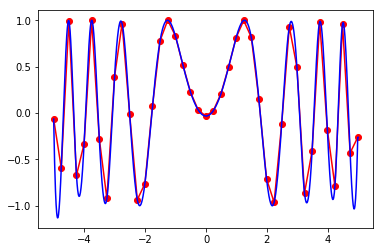

In [104]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

import matplotlib.pyplot as plt
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

In [109]:
x = incination_well_data['Координата Х (инклинометрия)']
y = incination_well_data['Координата Y (инклинометрия)']
z = incination_well_data['Вертикальная отметка']
mes = incination_well_data['Глубина конца интервала, м']


x_well_by_mes_and_vert_m = interpolate.interp2d(mes, z, x, kind='cubic')
y_well_by_mes_and_vert_m = interpolate.interp2d(mes, z, y, kind='cubic')

In [129]:
x = x_well_by_mes_and_vert_m(2621.5,1891.52)

In [130]:
x

array([-388.43962642])

In [140]:
angle = incination_well_data['Угол, гpад']
h_mes_m = incination_well_data['Глубина конца интервала, м']

In [141]:
interp1d_angle_linear = interpolate.interp1d(h_mes_m, angle, kind='cubic')

In [142]:
fact_h_mes = 3036.8
fact_h_vert = 1887.93

val_angle = interp1d_angle_linear(fact_h_mes)
print(val_angle)


91.48


In [176]:
class well_deviation_survey:
    def __init__(self):
        self.deviation_survey_dataframe = None
        self.h_vert_interpolate_func = None
        self.angle_from_vert_interpolate_func = None

        self.h_mes_m = None
        self.angle_from_vert_grad = None
        
    def __scip_last_row__(self):
        self.deviation_survey_dataframe = self.deviation_survey_dataframe.iloc[:-1]
    
    def __change_column_type__(self, column):
        column = column.str.replace(',','.')
        column = column.astype('float64')
        return column
    
    def load_deviation_survey(self, path_to_file_str):
        self.deviation_survey_dataframe = pd.read_excel(path_to_file_str)
        self.__scip_last_row__()
    
    def change_str_to_float(self):
        self.deviation_survey_dataframe['Координата Х (инклинометрия)'] = self.__change_column_type__(self.deviation_survey_dataframe['Координата Х (инклинометрия)'])
        self.deviation_survey_dataframe['Координата Y (инклинометрия)'] = self.__change_column_type__(self.deviation_survey_dataframe['Координата Y (инклинометрия)'])
        self.deviation_survey_dataframe['Вертикальная отметка'] = self.__change_column_type__(self.deviation_survey_dataframe['Вертикальная отметка'])
        self.deviation_survey_dataframe['Глубина конца интервала, м'] = self.__change_column_type__(self.deviation_survey_dataframe['Глубина конца интервала, м'])
        self.deviation_survey_dataframe['Угол, гpад'] = self.__change_column_type__(self.deviation_survey_dataframe['Угол, гpад'])
        
    def interpolate_all(self):
        self.h_vert_interpolate_func = interpolate.interp1d(self.deviation_survey_dataframe['Глубина конца интервала, м'],
                                                            self.deviation_survey_dataframe['Вертикальная отметка'], kind='cubic')
        self.angle_from_vert_interpolate_func =  interpolate.interp1d(self.deviation_survey_dataframe['Глубина конца интервала, м'],
                                                            self.deviation_survey_dataframe['Угол, гpад'], kind='cubic')
        
    def get_h_vert_m(self, h_mes_m):
        self.h_mes_m = self.h_vert_interpolate_func(h_mes_m)
        return self.h_mes_m
        
    def get_angle_from_vert_grad(self, h_mes_m):
        self.angle_from_vert_grad = self.angle_from_vert_interpolate_func(h_mes_m)
        return self.angle_from_vert_grad
        


In [177]:
path_to_file = './data/Инклинометрия 2196 нп.xls'

In [178]:
wds = well_deviation_survey()

In [179]:
wds.load_deviation_survey(path_to_file)

In [180]:
wds.change_str_to_float()

In [181]:
wds.interpolate_all()

In [175]:
print(wds.get_h_vert_m(3361))

1887.93


In [184]:
print(wds.get_angle_from_vert_grad(2939))

89.93936671022965


In [185]:
import uniflocpy.uWell.deviation_survey as ds

In [189]:
wds2 = ds.well_deviation_survey()

wds2.load_deviation_survey(path_to_file)

wds2.change_str_to_float()
wds2.interpolate_all()
print(wds2.get_h_vert_m(3361))

1887.93
